In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from sklearn.metrics import r2_score
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go


In [3]:
df = pd.read_csv('epi.csv', low_memory=False)
df

,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,prov_partic,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,TX,Texas,2014,1,1,0.0,0.0,0,0.055308,0.004509,...,1.0,NaN,0.097436,NaN,0.028647,0,7.244992,NaN,0.728038,0.283416
1,TN,Tennessee,2014,1,1,1.0,0.0,0,0.100030,0.001026,...,1.0,NaN,0.141904,NaN,0.038935,0,6.582538,NaN,0.743123,0.285635
2,IN,Indiana,2014,1,1,1.0,1.0,1,0.040475,NaN,...,0.0,NaN,0.106958,NaN,0.022689,1,4.858101,NaN,0.751587,0.288243
3,MS,Mississippi,2014,1,0,1.0,0.0,0,NaN,0.006813,...,0.0,NaN,0.185500,NaN,0.019775,0,2.431110,NaN,0.852437,0.288864
4,NY,New York,2014,1,1,0.0,0.0,0,0.134032,0.013328,...,1.0,NaN,0.138558,NaN,0.024116,1,4.624884,NaN,0.764596,0.289778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,NH,New Hampshire,2008,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.170602,NaN,0.021972,NaN,0,7.460956,0.011949,0.843120,0.725281
302,WI,Wisconsin,2008,1,1,NaN,NaN,NaN,NaN,0.000070,...,1.0,0.172879,NaN,0.008173,NaN,0,7.936197,0.004489,0.869157,0.727326
303,MN,Minnesota,2016,1,1,1.0,1.0,.,0.000659,NaN,...,1.0,0.154449,NaN,0.020148,NaN,1,6.853027,0.007765,0.886566,0.742486
304,MN,Minnesota,2012,1,1,1.0,1.0,.,0.000892,NaN,...,1.0,0.162802,NaN,0.012349,NaN,0,6.224818,0.004819,0.876896,0.761147


In [4]:
df = df.drop(['state_abbv', 'state_fips','year', 'website_pollingplace', 'website_reg_status', 'website_precinct_ballot', 'website_absentee_status', 'website_provisional_status', 'online_reg', 'residual'],axis=1)
df = df.fillna(0)
df

,reg_rej,prov_partic,prov_rej_all,abs_rej_all_ballots,abs_nonret,uocava_rej,uocava_nonret,eavs_completeness,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,wait,pct_reg_of_vep_vrs,vep_turnout
0,0.055308,0.004509,0.003323,0.001110,0.140261,0.082599,0.463799,0.974932,1.0,0.000000,0.097436,0.000000,0.028647,7.244992,0.728038,0.283416
1,0.100030,0.001026,0.000594,0.000086,0.102461,0.036513,0.365238,0.995547,1.0,0.000000,0.141904,0.000000,0.038935,6.582538,0.743123,0.285635
2,0.040475,0.000000,0.000000,0.004489,0.008893,0.161383,0.102930,0.968887,0.0,0.000000,0.106958,0.000000,0.022689,4.858101,0.751587,0.288243
3,0.000000,0.006813,0.001453,0.000907,0.091958,0.016393,0.451835,0.935205,0.0,0.000000,0.185500,0.000000,0.019775,2.431110,0.852437,0.288864
4,0.134032,0.013328,0.005568,0.003043,0.250948,0.080987,0.661878,0.906254,1.0,0.000000,0.138558,0.000000,0.024116,4.624884,0.764596,0.289778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.000000,0.000000,0.000000,0.001764,0.047409,0.043616,0.179815,0.687500,0.0,0.170602,0.000000,0.021972,0.000000,7.460956,0.843120,0.725281
302,0.000000,0.000070,0.000039,0.000914,0.053276,0.039234,0.310499,0.881599,1.0,0.172879,0.000000,0.008173,0.000000,7.936197,0.869157,0.727326
303,0.000659,0.000000,0.000000,0.002045,0.075431,0.075765,0.233482,1.000000,1.0,0.154449,0.000000,0.020148,0.000000,6.853027,0.886566,0.742486
304,0.000892,0.000000,0.000000,0.002634,0.043200,0.076314,0.210746,1.000000,1.0,0.162802,0.000000,0.012349,0.000000,6.224818,0.876896,0.761147


In [5]:
#get some information about our Data-Set
df.info()
df.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   reg_rej                       306 non-null    float64
 1   prov_partic                   306 non-null    float64
 2   prov_rej_all                  306 non-null    float64
 3   abs_rej_all_ballots           306 non-null    float64
 4   abs_nonret                    306 non-null    float64
 5   uocava_rej                    306 non-null    float64
 6   uocava_nonret                 306 non-null    float64
 7   eavs_completeness             306 non-null    float64
 8   post_election_audit           306 non-null    float64
 9   nonvoter_illness_onyear_pct   306 non-null    float64
 10  nonvoter_illness_offyear_pct  306 non-null    float64
 11  nonvoter_reg_onyear_pct       306 non-null    float64
 12  nonvoter_reg_offyear_pct      306 non-null    float64
 13  wait 

,count,mean,std,min,25%,50%,75%,max
reg_rej,306.0,0.038609,0.087078,0.000000,0.000000,0.002792,0.047226,0.671974
prov_partic,306.0,0.010185,0.018771,0.000000,0.000220,0.002359,0.009673,0.131301
prov_rej_all,306.0,0.002226,0.003194,0.000000,0.000062,0.001017,0.003047,0.019162
abs_rej_all_ballots,306.0,0.002186,0.002304,0.000000,0.000727,0.001575,0.002685,0.013357
abs_nonret,306.0,0.106250,0.093826,0.000000,0.039469,0.085069,0.146041,0.515648
uocava_rej,306.0,0.045879,0.048723,0.000000,0.014084,0.035549,0.065498,0.500000
uocava_nonret,306.0,0.320587,0.197206,0.000000,0.196508,0.279792,0.398657,0.880489
eavs_completeness,306.0,0.941942,0.115792,0.000000,0.937528,0.990837,1.000000,1.000000
post_election_audit,306.0,0.617647,0.486758,0.000000,0.000000,1.000000,1.000000,1.000000
nonvoter_illness_onyear_pct,306.0,0.076906,0.082756,0.000000,0.000000,0.017085,0.156346,0.260052


In [6]:
X = df.drop(['vep_turnout'],axis=1)
y = df['vep_turnout'].values


In [7]:
#splitting Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
#standardization scaler - fit&transform on train, fit only on test
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))
len(X_train[0])


15

In [8]:
# Multiple Liner Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, df.drop('vep_turnout',axis =1).columns, columns=['Coefficient']) 
coeff_df

0.5357214073170732
[ 0.00054812  0.0054573  -0.01807425  0.01862219 -0.00800682 -0.00285734
 -0.01209221  0.00259932  0.00290724  0.01130334 -0.06894903 -0.02247148
 -0.02407782  0.00197171  0.02032378]


,Coefficient
reg_rej,0.000548
prov_partic,0.005457
prov_rej_all,-0.018074
abs_rej_all_ballots,0.018622
abs_nonret,-0.008007
uocava_rej,-0.002857
uocava_nonret,-0.012092
eavs_completeness,0.002599
post_election_audit,0.002907
nonvoter_illness_onyear_pct,0.011303


<AxesSubplot:ylabel='Density'>

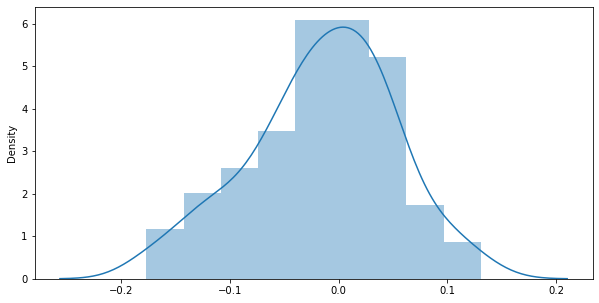

In [9]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [10]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,0.636943,0.602951
1,0.302299,0.469771
2,0.463281,0.640151
3,0.508719,0.497303
4,0.593531,0.608573
5,0.321655,0.436888
6,0.672101,0.636577
7,0.589415,0.569661
8,0.636207,0.511528
9,0.462142,0.444402


In [11]:

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.05318345585805503
MSE: 0.004643386135046113
RMSE: 0.0681423960177958
VarScore: 0.6478351376038698


In [13]:
# having 19 neuron is based on the number of available features
model = Sequential()
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [14]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

loss: 0.0019 - val_loss: 0.0090
Epoch 225/400
205/205 [==============================] - 0s 170us/sample - loss: 0.0018 - val_loss: 0.0090
Epoch 226/400
205/205 [==============================] - 0s 174us/sample - loss: 0.0018 - val_loss: 0.0089
Epoch 227/400
205/205 [==============================] - 0s 186us/sample - loss: 0.0018 - val_loss: 0.0089
Epoch 228/400
205/205 [==============================] - 0s 169us/sample - loss: 0.0018 - val_loss: 0.0089
Epoch 229/400
205/205 [==============================] - 0s 162us/sample - loss: 0.0018 - val_loss: 0.0089
Epoch 230/400
205/205 [==============================] - 0s 160us/sample - loss: 0.0018 - val_loss: 0.0089
Epoch 231/400
205/205 [==============================] - 0s 162us/sample - loss: 0.0018 - val_loss: 0.0089
Epoch 232/400
205/205 [==============================] - 0s 157us/sample - loss: 0.0018 - val_loss: 0.0089
Epoch 233/400
205/205 [==============================] - 0s 169us/sample - loss: 0.0018 - val_loss: 0.0089
Epoch

In [15]:
# predict values for the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# score the training predictions with r2_score()
r2_score(y_train, y_train_pred)

0.9278794131330023

<AxesSubplot:>

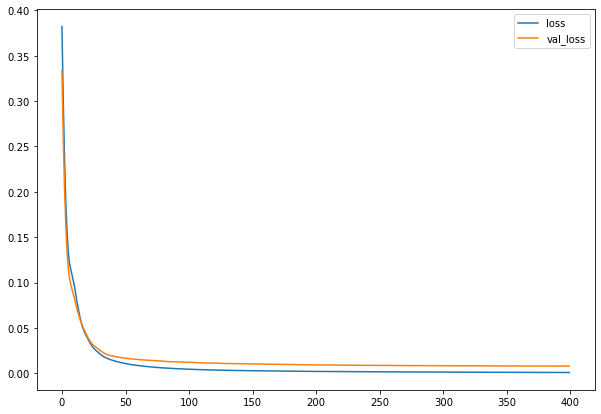

In [16]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(10,7))

MAE: 0.06724182988090893
MSE: 0.00790844715028991
RMSE: 0.08892945041036693
VarScore: 0.3881480700132105


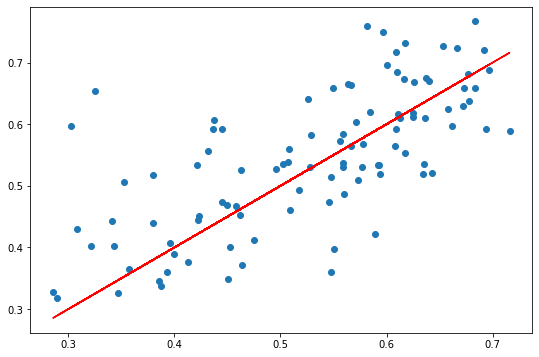

In [20]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(9,6))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.show()

<AxesSubplot:ylabel='Density'>

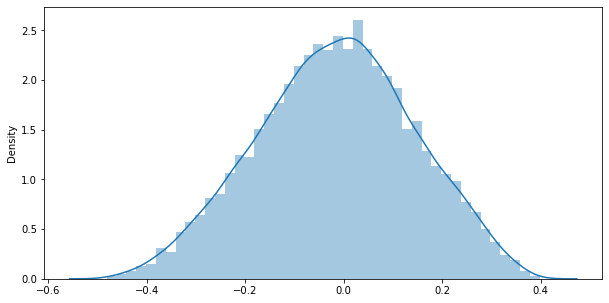

In [18]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)